# LUMPI Label Only Tutorial
This Jupyter notebook explains the label only example in more detail. This tutorial uses:
- the LUMPI parser 
  - to load the labels 
  - to interpolate the bounding boxes for the camera frames
  - the CameraView within the LUMPParser is used
    - to load the camera images, masks, and parameters
    - to project the 3D bounding boxes from the lidar frame into the camera frame
    - to use the frustum for bounding box clipping

First, the path to the SDK objects is appended and all necessary functions are imported:

In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from objects.LumpiParser import LumpiParser


Then the path to the LUMP dataset is defined. The following structure is expected to load all meta information, camera devices, and point cloud files by the **measurement_id**:
- Root
  - Measurement**1**
    - Label.csv
    - cam
        - **5** (camera device id)
            - video.mp4 (optional)
            - mask.mp4

In [ ]:
lp=LumpiParser(path="/media/busch/ExternSSD1T/Label")
measurement_id=6
lp.read_all_cameras(measurement_id,True)

loading meta 65
loading camera 65
Camera 65 video not found
/media/busch/ExternSSD1T/Label/Measurement6/cam/5/mask.mp4
(1080, 1920, 3)
loading meta 72
loading camera 72
Camera 72 video not found
/media/busch/ExternSSD1T/Label/Measurement6/cam/6/mask.mp4
(1232, 1640, 3)
loading meta 79
loading camera 79
Camera 79 video not found
/media/busch/ExternSSD1T/Label/Measurement6/cam/7/mask.mp4
(1232, 1640, 3)


Afterwards, all labels are loaded for the measurements by an arbitrary path. This line expects the labels as a Label.csv file within each measurement directory:


In [3]:
lp.read_track(os.path.join(lp.path,"Measurement"+str(measurement_id),"Label.csv"))

reading tracks


100%|██████████| 897142/897142 [00:13<00:00, 68036.45it/s]


To begin a camera is chosen and a start frame is set.

In [9]:
# Choose camera
cam = lp.cameras[1]
start=100

This line initializes matplotlib for displaying the image directly in the Jupyter notebook and is not part of the camera_example.py.

In [5]:
# Initialization of notebook display
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
plt.ion()
import cv2

The first line initializes the plot within the notebook. The loop iterates over all frames of the camera:
- increment the time by FPS
- get the index of point clouds (sometimes a frame is between two point clouds)
- load frame from camera (optional with mask)

KeyboardInterrupt: 

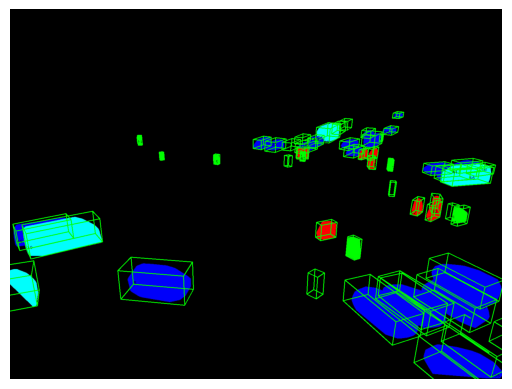

In [10]:
fig, ax = plt.subplots()
for i in range(start, 1000):
    cam.set_frame(i,True)
    bb=lp.get_bounding_boxes_at(i/cam.fps)
    cam.plot_bounding_boxes_3D(bb,[0,255,0])  
    # Show image in notebook
    ax.clear()
    ax.imshow(cv2.cvtColor(cam.img, cv2.COLOR_BGR2RGB))
    ax.axis('off')  # Hide axes
    display(fig)
    clear_output(wait=True)